In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-data/Bank Customer Churn Prediction.csv


In [5]:
df=pd.read_csv('/kaggle/input/customer-churn-data/Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [13]:
df['gender'].value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

In [14]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [15]:
df.drop(columns=['customer_id'],inplace=True)

In [16]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [24]:
new_gender=pd.get_dummies(df['gender'],drop_first=True,dtype="int64")
new_gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [25]:
df=pd.concat([df,new_gender],axis=1)

In [27]:
df.drop(columns=['gender'],inplace=True)

In [28]:
df

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0.00,2,1,0,96270.64,0,1
9996,516,France,35,10,57369.61,1,1,1,101699.77,0,1
9997,709,France,36,7,0.00,1,0,1,42085.58,1,0
9998,772,Germany,42,3,75075.31,2,1,0,92888.52,1,1


In [29]:
new_country=pd.get_dummies(df['country'],drop_first=True,dtype="int64")
new_country

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [30]:
df=pd.concat([df,new_country],axis=1)
df.drop(columns=['country'],inplace=True)

In [31]:
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   products_number   10000 non-null  int64  
 5   credit_card       10000 non-null  int64  
 6   active_member     10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   churn             10000 non-null  int64  
 9   Male              10000 non-null  int64  
 10  Germany           10000 non-null  int64  
 11  Spain             10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [33]:
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


In [35]:
x=df.drop(['churn'],axis=1)
y=df['churn']

In [36]:
    x

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0


In [37]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [40]:
x_train

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,Male,Germany,Spain
2694,628,29,3,113146.98,2,0,1,124749.08,1,1,0
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,0,1,0
3671,646,52,6,111739.40,2,0,1,68367.18,0,1,0
7427,714,33,8,122017.19,1,0,0,162515.17,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,1,0
7813,684,63,3,81245.79,1,1,0,69643.31,0,1,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [47]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  0.91509065,
         1.71490137, -0.57273139],
       [-0.25150912, -0.94449979, -0.35520275, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [-0.3963303 ,  0.77498705,  0.33787579, ..., -1.09278791,
         1.71490137, -0.57273139],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -1.09278791,
        -0.58312392, -0.57273139],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  0.91509065,
         1.71490137, -0.57273139]])

In [48]:
x_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ...,  0.91509065,
        -0.58312392, -0.57273139],
       [ 0.30708683, -0.46686456, -0.70174202, ...,  0.91509065,
        -0.58312392, -0.57273139],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -1.09278791,
        -0.58312392, -0.57273139],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ...,  0.91509065,
        -0.58312392,  1.74601919],
       [-0.30323097, -0.84897275, -1.0482813 , ..., -1.09278791,
         1.71490137, -0.57273139],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  0.91509065,
         1.71490137, -0.57273139]])

In [49]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers

In [88]:
model = Sequential()
model.add(Dense(8,activation="relu",input_dim=11))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 96        
                                                                 
 dense_13 (Dense)            (None, 5)                 45        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [92]:
history=model.fit(x_train_scaled,y_train,epochs=350,validation_split=0.2)

Epoch 1/350
200/200 [==============================] - 1s 3ms/step - loss: 0.7625 - accuracy: 0.5303 - val_loss: 0.6050 - val_accuracy: 0.7781
Epoch 2/350
200/200 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7914 - val_loss: 0.4876 - val_accuracy: 0.8037
Epoch 3/350
200/200 [==============================] - 1s 3ms/step - loss: 0.4640 - accuracy: 0.8017 - val_loss: 0.4505 - val_accuracy: 0.8081
Epoch 4/350
200/200 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.8078 - val_loss: 0.4324 - val_accuracy: 0.8131
Epoch 5/350
200/200 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8128 - val_loss: 0.4219 - val_accuracy: 0.8112
Epoch 6/350
200/200 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8150 - val_loss: 0.4131 - val_accuracy: 0.8150
Epoch 7/350
200/200 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8167 - val_loss: 0.4048 - val_accuracy: 0.8181

In [94]:
model.layers[1].get_weights()

[array([[-0.16070276, -1.8126932 , -0.2675199 ,  0.23984557,  0.07669076],
        [-0.04953255, -0.07799847, -0.35285738,  0.03657702,  0.765919  ],
        [-0.14142291, -0.82837677,  0.3807992 , -1.2842244 ,  0.59518296],
        [ 0.0998394 , -0.6155469 , -2.202014  , -0.470057  , -0.0990076 ],
        [-0.676047  ,  0.15438913, -0.65671456,  0.33575565, -0.5864173 ],
        [ 0.21003231,  0.86408955,  0.7067217 ,  0.2922165 ,  0.42661124],
        [ 1.0809157 ,  0.5215025 ,  0.14284633,  0.60870856,  0.26646522],
        [ 0.07288761,  0.27335677, -0.42132986,  0.28957447, -1.1761253 ]],
       dtype=float32),
 array([-0.32152918,  0.09943265, -0.5630596 ,  1.0013252 ,  1.0939677 ],
       dtype=float32)]

In [105]:
history.history

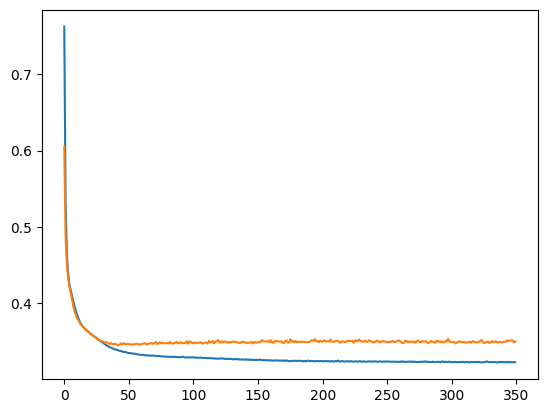

In [107]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

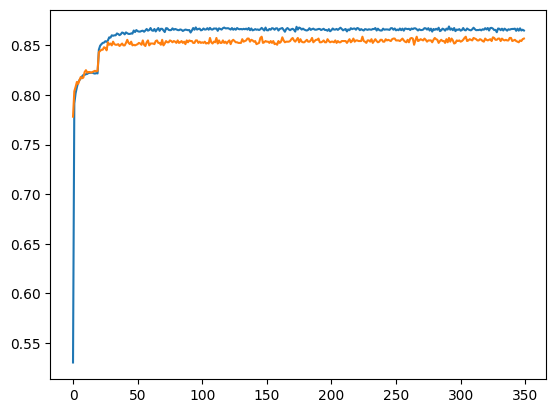

In [108]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [100]:
y_log=model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [101]:
y_pred=np.where(y_log>0.5,1,0)

In [102]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.8645